# Lab 3: Clustering and Manifold Learning (2%)

# Craig Phayer - 21340633

In this exercise, you will be introduced to standard techniques for unsupervised ML used also for EDA. These include the k-means clustering algorithm and manifold-learning techniques, such as multi-dimensional scaling (MSD) and t-SNE. This exercise aims to practice these techniques for discovering and visualising hidden patterns in data.

At the end of this exercise you should be able to:

Apply a clustering algorithm for partitioning a data set into clusters of similar examples.
Use a manifold-learning technique to visualise a clustered data set with 3 or more numerical attributes as a 2D scatter plot.

### Task 1
Download the following dataset and example notebooks:\
[iris_nolabels.csv](https://learn.ul.ie/content/enforced/49261-CS4168_SEM2_2024_5/iris_nolabels.csv)\
[Lab 3 - Clustering and Manifold Learning (without pipeline).ipynb](https://learn.ul.ie/content/enforced/49261-CS4168_SEM2_2024_5/Lab%203%20-%20Clustering%20and%20Manifold%20Learning%20(without%20pipeline).ipynb)\
[Lab 3 - Clustering and Manifold Learning (with pipeline).ipynb](https://learn.ul.ie/content/enforced/49261-CS4168_SEM2_2024_5/Lab%203%20-%20Clustering%20and%20Manifold%20Learning%20(with%20pipeline).ipynb)

### Task 2
Follow the example notebooks to cluster either the loans_train dataset or the bank dataset after it has been prepared for ML (i.e. the result of Lab 2). That is, there is no need to use a data preprocessing pipeline. Use the k-means clustering algorithm and visualise the clustering. Pick a value of k suggested by MDS and t-SNE visualisations of the dataset. Experiment with various values of the parameters of k-Means. Aim at producing a meaningful clustering that allows you to describe the clusters with words. Write a short conclusion about the characteristics of the clusters.

### Task 3
Plot the sum of squared distances from the data points to the k-Means clusters' centres for various values of k. Use the Elbow method to pick the best value of k. If it suggests a different value of k (from the one you used in Task 2), compute a new k-Means clustering.

### Task 4
Implement and plot the results of the Silhouette method for determining the best value of k for k-Means. Compare the results of the Elbow method to the results of the Silhouette method.

### Task 5
Apply another clustering algorithm (from the ones available in scikit-learn, e.g. DBSCAN) to the same dataset and an appropriate manifold-learning technique to visualise the clustering.

In [1]:
# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.manifold import MDS, TSNE #needed for multidimensional scaling (MDS) and t-SNE
from sklearn.cluster import KMeans #needed for k-Means clustering
from sklearn import preprocessing #needed for scaling attributes to the nterval [0,1]
import warnings

warnings.simplefilter("ignore")

This data was created from my lab 2 which, if done correctly (I hope), should be prepared for Machine learning

In [2]:
df = pd.read_csv('../Data/bank_data_prep.csv')

df.head(15)

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,marital_divorced,marital_married,marital_single
0,-0.768987,0,-0.162160,1,0,1,1.470707,0.226294,-0.275095,0.000000,...,False,False,False,False,False,False,False,False,False,True
1,-0.217065,0,0.105817,1,1,1,-0.013413,0.226294,-0.262445,-0.584963,...,False,False,False,False,False,False,False,True,False,False
2,1.359857,0,0.300504,1,1,1,-0.656889,0.226294,0.228714,-0.584963,...,False,False,False,False,False,False,False,False,True,False
3,0.413704,0,-0.154928,1,1,1,0.156581,0.000000,0.225190,0.000000,...,False,False,False,False,False,False,False,False,True,False
4,0.965627,0,0.286003,1,0,1,0.743074,0.000000,0.439362,-0.584963,...,False,False,False,False,False,False,False,False,True,False
5,0.334858,0,0.247442,1,0,1,0.707378,0.000000,-0.262445,0.415037,...,False,False,False,False,False,False,False,True,False,False
6,-0.611295,0,0.596226,1,1,1,-0.400598,0.226294,0.276571,-0.584963,...,False,False,False,False,False,False,False,False,True,False
7,0.256012,0,-0.157327,1,1,1,0.064617,0.511392,0.497652,0.736966,...,False,False,False,False,False,False,False,True,False,False
8,1.281011,0,-0.266246,1,0,1,-0.699181,0.226294,-0.249982,0.000000,...,False,False,False,False,False,False,False,True,False,False
9,0.571396,0,1.730585,0,0,1,0.197877,0.386853,-0.268747,0.000000,...,False,False,False,False,False,False,False,True,False,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    2000 non-null   float64
 1   default                2000 non-null   int64  
 2   balance                2000 non-null   float64
 3   housing                2000 non-null   int64  
 4   loan                   2000 non-null   int64  
 5   day                    2000 non-null   int64  
 6   duration               2000 non-null   float64
 7   campaign               2000 non-null   float64
 8   pdays                  2000 non-null   float64
 9   previous               2000 non-null   float64
 10  subscribed             2000 non-null   int64  
 11  job_admin.             2000 non-null   bool   
 12  job_blue-collar        2000 non-null   bool   
 13  job_entrepreneur       2000 non-null   bool   
 14  job_housemaid          2000 non-null   bool   
 15  job_

In [4]:
df.describe()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,subscribed
count,2.000000e+03,2000.000000,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,-2.557954e-16,0.007500,-3.218682e-01,0.481500,0.125000,13.851500,-0.053255,0.164409,-0.973710,-0.150103,0.500000
std,1.000250e+00,0.086299,1.452779e+00,0.499783,0.330802,9.712189,0.808613,0.208393,1.919528,1.036904,0.500125
min,-1.872833e+00,0.000000,-6.301521e+00,0.000000,0.000000,1.000000,-3.567948,0.000000,-4.419787,-1.584963,0.000000
25%,-7.689874e-01,0.000000,-4.786553e-01,0.000000,0.000000,5.000000,-0.502904,0.000000,-0.730103,-0.584963,0.000000
50%,-2.959108e-01,0.000000,-2.000353e-16,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,6.502423e-01,0.000000,5.213447e-01,1.000000,0.000000,23.000000,0.497096,0.226294,0.269897,0.415037,1.000000
max,4.040624e+00,1.000000,2.382349e+00,1.000000,1.000000,31.000000,2.148725,1.000000,1.302929,4.222392,1.000000


In [5]:
def plot_mds(data, labels=None, title="MDS plot of data"):
    mds = MDS(n_components=2, random_state=42)
    mds_transformed = mds.fit_transform(data)

    plt.figure(figsize=(8,6))
    scatter_plt = plt.scatter(mds_transformed[:, 0], mds_transformed[:, 1], c=labels, cmap="viridis", alpha=.7)

    if labels is not None:
        plt.colorbar(scatter_plt, label="Cluster")

    plt.title(title)
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.show()

def plot_tsne(data, labels=None, title="t-SNE plot of data"):
    tsne = TSNE(n_components=2, random_state=42)
    tsne_transformed = tsne.fit_transform(data)

    plt.figure(figsize=(8,6))
    scatter_plt = plt.scatter(tsne_transformed[:, 0], tsne_transformed[:, 1], c=labels, cmap="viridis", alpha=.7)

    if labels is not None:
        plt.colorbar(scatter_plt, label="Cluster")

    plt.title(title)
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.show()

### Before clustering

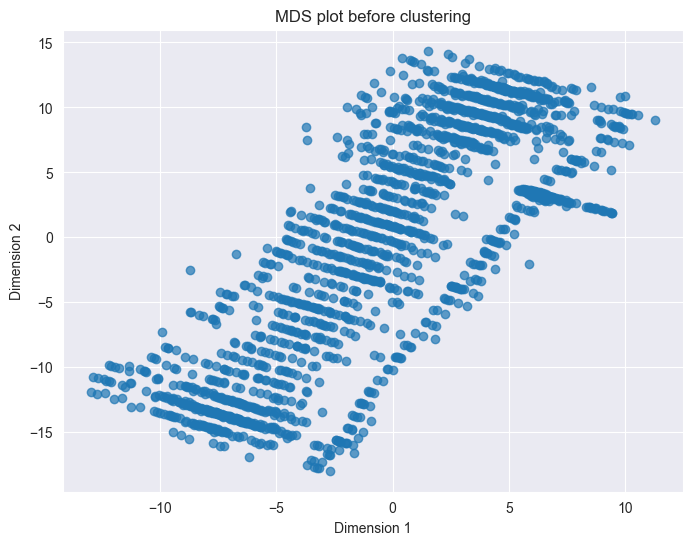

In [6]:
plot_mds(df, title="MDS plot before clustering")

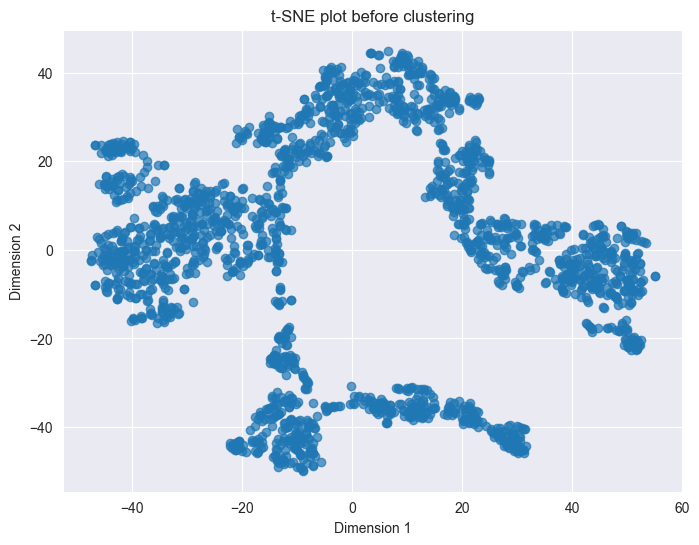

In [7]:
plot_tsne(df, title="t-SNE plot before clustering")

### K-Means Clustering

In [8]:
k = 4

kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300)
df["Cluster"] = kmeans.fit_predict(df)

df["Cluster"].value_counts()

Cluster
1    612
2    506
0    442
3    440
Name: count, dtype: int64

In [9]:
cluster_means = df.groupby(df["Cluster"]).mean()
cluster_means

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,marital_divorced,marital_married,marital_single
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.148759,0.002262,0.064860,0.287330,0.070136,17.013575,0.155428,0.170629,-0.991460,-0.068514,...,0.158371,0.079186,0.074661,0.106335,0.106335,0.104072,0.115385,0.124434,0.536199,0.339367
1,-0.045940,0.006536,-0.530088,0.619281,0.168301,3.531046,-0.228062,0.180155,-0.117744,0.086549,...,0.026144,0.022876,0.003268,0.084967,0.004902,0.003268,0.053922,0.102941,0.588235,0.308824
2,0.030618,0.007905,-0.337719,0.482213,0.162055,27.875494,-0.042060,0.158580,-0.506545,0.013097,...,0.100791,0.079051,0.045455,0.077075,0.000000,0.043478,0.031621,0.120553,0.511858,0.367589
3,-0.120746,0.013636,-0.402512,0.484091,0.077273,8.902273,-0.032621,0.142963,-2.683692,-0.748906,...,0.068182,0.034091,0.027273,0.443182,0.040909,0.052273,0.077273,0.081818,0.579545,0.338636


### After Clustering

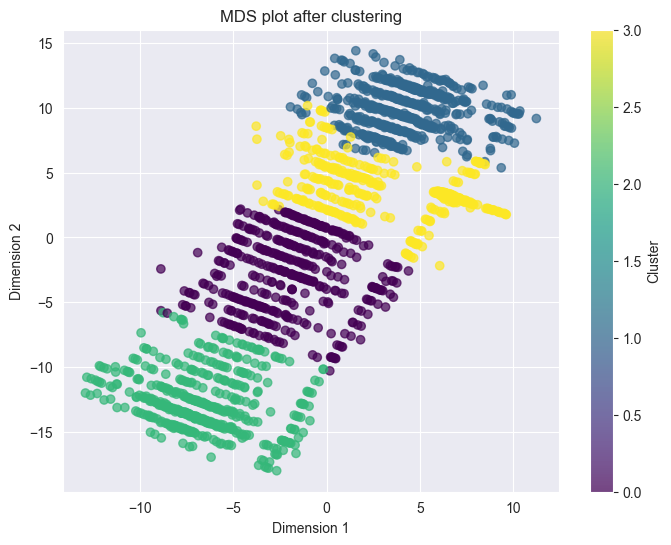

In [22]:
plot_mds(df, labels=df["Cluster"] ,title="MDS plot after clustering")

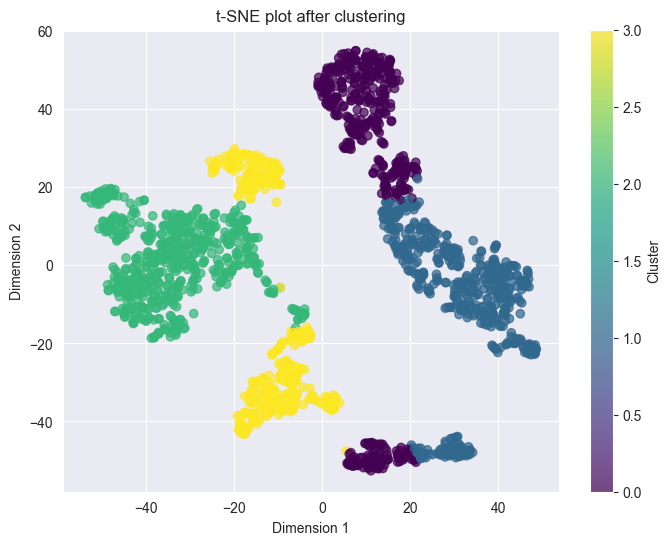

In [31]:
plot_tsne(df, labels=df["Cluster"] ,title="t-SNE plot after clustering")

## Elbow method

In [ ]:
def elbow_method(data, max_k=10):
    inertias = []
    k_values = range(1, max_k + 1)

    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)
        